# General statistics

In [41]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as dates

params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'PiYG',
    'axes.linewidth': 0.25,
    'axes.grid': False,
    'savefig.dpi': 400,
    'axes.labelsize': 7, # Adjust the font size of x and y labels.
    'axes.titlesize': 9,
    'axes.facecolor': 'white',
    'xtick.major.size': 2,
    'ytick.major.width': 0.25,
    'ytick.major.size': 2,
    'xtick.major.width': 0.25,
    'xtick.major.pad': '4',
    'ytick.major.pad': '4',
    'xtick.minor.size': 2,
    'ytick.minor.width': 0.25,
    'ytick.minor.size': 2,
    'xtick.minor.width': 0.25,
    'font.size': 7, 
    'legend.fontsize': 7,
    'xtick.labelsize': 7,
    'ytick.labelsize': 7,
    'lines.linewidth': 0.25,
    'patch.linewidth': 0.25,
    #'text.usetex': True,
    'figure.figsize': [7, 7],
    'font.family': 'sans-serif',
    'font.sans-serif': 'Arial'
}
matplotlib.rcParams.update(params)

## 1. Number of days players played the game

Players accessed the game for 5.7 days on average. The median value is 3. 

In [42]:
days_df = pd.read_csv("data/general_stats/num_of_days.csv")
print(days_df['days'].mean())
print(days_df['days'].median())

5.766681832927859
3.0


## 2. Matches by day and matches by player

In [43]:
# Count the number of matches by date 
mids_by_date = pd.read_csv("data/general_stats/mids_by_date.csv")
mids_by_date['m_date'] = pd.to_datetime(mids_by_date['m_date'], format='%Y-%m-%d')
mids_by_date['day'] = mids_by_date['m_date'].dt.dayofweek
days = {0:'M', 1:'T', 2:'W', 3:'T', 4:'F', 5:'S', 6:'S'}
mids_by_date['day'] = mids_by_date['day'].apply(lambda x: days[x])
mids_by_date = mids_by_date.sort_values(['m_date'])
mids_by_date.set_index(['m_date'], inplace=True)
print(mids_by_date)

            num_of_mids day
m_date                     
2019-03-01        48886   F
2019-03-02        48995   S
2019-03-03        45696   S
2019-03-04        33555   M
2019-03-05        30504   T
2019-03-06        30434   W
2019-03-07        31267   T
2019-03-08        36469   F
2019-03-09        50479   S
2019-03-10        46290   S
2019-03-11        29363   M
2019-03-12        29157   T
2019-03-13        29009   W
2019-03-14        29890   T
2019-03-15        37090   F
2019-03-16        50550   S
2019-03-17        45816   S
2019-03-18        29833   M
2019-03-19        29523   T
2019-03-20        29240   W
2019-03-21        31193   T
2019-03-22        36154   F
2019-03-23        50375   S
2019-03-24        45624   S
2019-03-25        29115   M
2019-03-26        27491   T
2019-03-27        29446   W
2019-03-28        24271   T
2019-03-29        36189   F
2019-03-30        49550   S
2019-03-31        45487   S


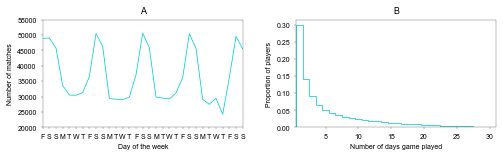

In [84]:
# Plot weekly cycle and number of days playing game

fig, ax = plt.subplots(1, 2, figsize=(7, 2.2))
mids_by_date.plot(ax=ax[0], c='darkturquoise', lw=0.75)
ax[0].set_xticks(mids_by_date.index)
ax[0].set_xticklabels(mids_by_date["day"].values)
ax[0].get_legend().remove()
ax[0].set_ylim(ymin=20000, ymax=55000)
ax[0].set_xlabel("Day of the week")
ax[0].set_ylabel("Number of matches")
ax[0].set_title("A")

# Plot the distribution of days players played the game
bins = np.arange(0, days_df['days'].max() + 1.5) - 0.5
days_df.hist(ax=ax[1], column='days', histtype='step', 
             weights=np.zeros_like(days_df['days'])+1./len(days_df['days']), 
             bins=bins, grid=False, color='darkturquoise', lw=0.75)
ax[1].set_xlim(xmin=0.5, xmax=31)
ax[1].set_xlabel("Number of days game played")
ax[1].set_ylabel("Proportion of players")
ax[1].set_title("B")
plt.tight_layout(w_pad=3)
plt.show()
fig.savefig('figs/paper/fig_s4.pdf', format='pdf')

In [45]:
# Count the total number of matches.
# The answer should be 1,146,941.
print(mids_by_date['num_of_mids'].sum())

1146941


## 3. Stats for cheaters vs. non-cheaters

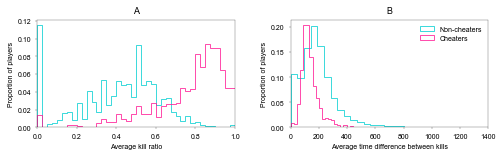

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(7, 2.2))

### Plot a histogram of the average kill ratio for players

# Read the average kill ratio for cheaters.
c_avg_kill_ratio = pd.read_csv("data/cheater_analysis/c_avg_kill_ratio.csv")
# Read the average kill ratio for non-cheaters.
nc_avg_kill_ratio = pd.read_csv("data/cheater_analysis/nc_avg_kill_ratio.csv")


nc_avg_kill_ratio.hist(column='avg_kill_ratio', histtype='step', edgecolor='darkturquoise', lw=0.75, 
                       bins=40, label='Non-cheaters', grid = False, ax=ax[0],
                       weights=np.zeros_like(nc_avg_kill_ratio['avg_kill_ratio'])+1./len(nc_avg_kill_ratio['avg_kill_ratio']))
c_avg_kill_ratio.hist(column='avg_kill_ratio', histtype='step', edgecolor='deeppink', lw=0.75, 
                      bins=40, label='Cheaters', grid = False, ax=ax[0],
                      weights=np.zeros_like(c_avg_kill_ratio['avg_kill_ratio'])+1./len(c_avg_kill_ratio['avg_kill_ratio']))
ax[0].set_title('A')
ax[0].set_xlim(0, 1)
ax[0].set_xlabel('Average kill ratio')
ax[0].set_ylabel('Proportion of players')


### Plot a histogram of the average time difference between consecutive kills

# Read the average kill interval for cheaters.
c_avg_kill_interval = pd.read_csv("data/cheater_analysis/c_avg_kill_interval.csv")
# Read the average kill interval for non-cheaters.
nc_avg_kill_interval = pd.read_csv("data/cheater_analysis/nc_avg_kill_interval.csv")

# Plot the histograms of cheaters and non-cheaters together.
nc_avg_kill_interval.hist(column='delta', histtype='step', edgecolor='darkturquoise', lw=0.75, 
                          bins=40, label='Non-cheaters', grid = False, ax=ax[1], 
                          weights=np.zeros_like(nc_avg_kill_interval['delta'])+1./len(nc_avg_kill_interval['delta']))
c_avg_kill_interval.hist(column='delta', histtype='step', edgecolor='deeppink', lw=0.75, 
                         bins=40, label='Cheaters', grid = False, ax=ax[1], 
                         weights=np.zeros_like(c_avg_kill_interval['delta'])+1./len(c_avg_kill_interval['delta']))
ax[1].set_title('B')
ax[1].set_xlabel('Average time difference between kills')
ax[1].set_ylabel('Proportion of players')
ax[1].set_xlim(0, 1400) # Exclude outliers.
ax[1].legend(loc='upper right', frameon=False)

plt.tight_layout(w_pad=3)
plt.savefig('figs/paper/fig_s2.pdf', format='pdf')
plt.show()

## 4. Estimated period of cheating

In [48]:
estim = pd.read_csv("data/general_stats/estimated_cheating_time.csv")
print(estim['period'].mean())
print(estim['period'].median())

4.364765100671141
2.0


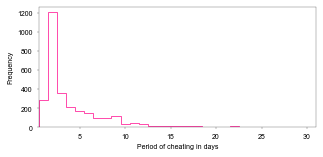

In [107]:
# Plot the distribution of the period of cheating.
# The plot contains cheaters who have full performance information.
fig, ax = plt.subplots(1, 1, figsize=(4.5, 2.2))
bins = np.arange(0, estim['period'].max() + 1.5) - 0.5
estim.hist(bins = bins, histtype='step', edgecolor='deeppink', lw=0.75, grid=False, ax=ax)
ax.set_title('')
ax.set_xlim(0.5, 31)
ax.set_xlabel('Period of cheating in days')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('figs/paper/fig_s3.pdf', format='pdf')
plt.show()

## 5. Number of cheaters by ban date

In [50]:
num_of_cheaters = pd.read_csv("data/general_stats/num_of_cheaters.csv")
num_of_cheaters['ban_date'] = pd.to_datetime(num_of_cheaters['ban_date'], format='%Y-%m-%d')
num_of_cheaters = num_of_cheaters.sort_values(['ban_date'])
num_of_cheaters.set_index(['ban_date'], inplace=True)
print(num_of_cheaters)

            num_of_cheaters
ban_date                   
2019-03-01              103
2019-03-02              290
2019-03-03              258
2019-03-04              312
2019-03-05              228
2019-03-06              702
2019-03-07              262
2019-03-08              145
2019-03-09              690
2019-03-10              135
2019-03-11              511
2019-03-12              324
2019-03-13              188
2019-03-14              139
2019-03-15              132
2019-03-16              107
2019-03-17              144
2019-03-19              116
2019-03-20              112
2019-03-21              105
2019-03-22              118
2019-03-23              176
2019-03-24               99
2019-03-25               89
2019-03-26              170
2019-03-27              111
2019-03-28               99
2019-03-29              114
2019-03-30               93
2019-03-31               89


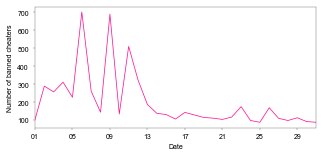

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 2.2))
num_of_cheaters.plot(c='deeppink', lw=0.75, ax=ax)
ax.get_legend().remove()
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))
plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='center')
ax.set_xlabel("Date")
ax.set_ylabel("Number of banned cheaters")
plt.tight_layout()
plt.show() 

In [52]:
# Count the total number of cheaters.
# The answer should be 6,161.
print(num_of_cheaters['num_of_cheaters'].sum())

6161
